In [29]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [30]:
df_rotacion = pd.read_csv('df_filtrado_notnulls.csv')

In [31]:
df_rotacion.sample(10)

,employee_turnover,business_travel_frequency,distance_from_home_km,education_level,environmental_satisfaction_level,gender,job_involvement_level,job_level,job_satisfaction_level,marital_status,num_companies_worked,overtime_hours,percent_salary_hike,standard_work_hours,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,remote_work,total_years_worked,annual_salary,work_life_balance
704,yes,travel_frequently,7.0,3,1.0,female,3,1,3,unknown,1,none,16,part_time,1,4,6,2,1999,yes,6.0,28111.13,3.0
1028,no,unknown,10.0,2,3.0,male,1,2,2,single,1,no,13,part_time,0,4,19,9,1982,yes,19.0,53914.11,3.0
254,no,travel_rarely,25.0,2,2.0,female,2,2,4,unknown,0,no,13,none,2,2,9,8,1978,yes,10.0,53914.11,2.0
1229,no,unknown,16.0,2,4.0,male,4,1,4,unknown,1,yes,13,none,2,2,1,0,2001,no,10.0,28111.13,2.0
1307,no,unknown,17.0,2,4.0,male,2,1,2,married,1,no,21,part_time,1,2,1,0,1999,yes,1.0,21270.00,3.0
881,no,unknown,25.0,2,4.0,female,3,2,3,unknown,7,none,12,none,1,2,2,2,1993,no,4.0,53914.11,4.0
304,no,travel_rarely,7.0,3,2.0,male,4,2,4,unknown,4,none,11,part_time,1,3,8,7,1992,yes,10.0,53914.11,2.0
1486,no,unknown,1.0,4,4.0,male,3,5,4,unknown,9,no,17,none,2,0,2,2,1977,yes,23.0,191324.62,3.0
1450,no,travel_rarely,3.0,3,2.0,female,3,1,2,unknown,1,no,19,none,1,3,1,0,1995,yes,1.0,53914.11,3.0
115,no,unknown,7.0,4,3.0,male,2,2,1,unknown,6,none,13,part_time,1,3,11,9,1989,yes,13.0,53914.11,3.0


In [32]:
df_rotacion.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

In [33]:
df_rotacion.shape

(1614, 23)

In [34]:
df_rotacion = df_rotacion[df_rotacion['employee_turnover']=='yes']

In [35]:
df_rotacion.shape

(259, 23)

In [36]:
df_rotacion['employee_turnover'].value_counts()

employee_turnover
yes    259
Name: count, dtype: int64

In [37]:
df_rotacion = df_rotacion.drop(['employee_turnover', 'education_level','marital_status',
    'num_companies_worked','percent_salary_hike',
    'training_sessions_last_year', 'birth_year', 
    'total_years_worked'], axis = 1)

In [38]:
df_rotacion

,business_travel_frequency,distance_from_home_km,environmental_satisfaction_level,gender,job_involvement_level,job_level,job_satisfaction_level,overtime_hours,standard_work_hours,stock_option_level,years_at_company,years_with_current_manager,remote_work,annual_salary,work_life_balance
13,travel_rarely,12.0,2.0,female,3,5,3,no,full_time,0,22,8,no,195450.00,3.0
16,travel_rarely,2.0,4.0,male,3,5,2,yes,full_time,0,31,8,no,192460.00,3.0
26,unknown,2.0,1.0,female,1,5,4,no,full_time,1,32,9,yes,198450.00,3.0
43,travel_rarely,16.0,3.0,female,4,1,1,none,part_time,0,17,14,yes,28111.13,3.0
52,travel_rarely,10.0,4.0,male,2,3,1,none,none,0,13,0,no,53914.11,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,unknown,1.0,1.0,female,1,1,2,yes,part_time,0,7,7,yes,22160.00,3.0
1600,unknown,2.0,3.0,male,3,2,4,none,none,0,9,3,yes,53914.11,2.0
1602,unknown,5.0,3.0,female,2,1,3,none,part_time,1,8,7,yes,23660.00,3.0
1604,unknown,2.0,2.0,female,1,1,4,yes,part_time,1,7,0,yes,28111.13,2.0


In [39]:
df_rotacion.columns

Index(['business_travel_frequency', 'distance_from_home_km',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'overtime_hours',
       'standard_work_hours', 'stock_option_level', 'years_at_company',
       'years_with_current_manager', 'remote_work', 'annual_salary',
       'work_life_balance'],
      dtype='object')

### Análisis

Aunque no tengamos los datos conectados por empleado, vemos que donde hay fuga, hay también ciertas condiciones que podrían estar afectando la salud mental”.


1. Vamos a analizar este dataframe (de rotación) y ver qué condiciones están más presentes en empleados que se fueron, y luego contrastarlas con los factores que en el otro dataset influyen negativamente en la salud mental (por ejemplo: mala percepción de beneficios, supervisión, anonimato, etc.).


2. Vamos a enfocarnos únicamente en los empleados que ya se fueron y analizaremos las condiciones en las que trabajaban antes de irse, para identificar patrones de riesgo o posibles causas de fuga.


##### ✅ ¿Qué nos dicen los datos de los empleados que se fueron sobre cómo era su entorno laboral y cómo podría haber influido en su decisión?”


-------------------------------------------------------------------------------------------------------------------------



#### 📌 Cuestiones a estudiar


##### 1. Sobrecarga de trabajo

Dato: empleados que se fueron tenían más overtime_hours o low work_life_balance.



#####  2. Baja satisfacción laboral

Dato: cuál era el  job_satisfaction_level de quiénes se marcharon.



#####  3. Lejanía de casa, poco remote work y frecuencias de viajes alta

Dato: distance_from_home_km alta y remote_work baja en quienes se marcharon.



#####  4. Poca relación con liderazgo

Dato: years_with_current_manager bajos pueden indicar falta de relación sólida.



#####  5. Afecta el nivel de jerarquía en la empresa a la satisfacción general en el entorno laboral

Dato: job_involvement_level','job_level', 'job_satisfaction_level'



#####  6. La promoción dentro de la emprea es viable

Dato: 'stock_option_level', 'years_at_company',



#####  7. Los empleados mejoran su balance de vida personal y profesional a mayores salario

Dato: 'annual_salary','work_life_balance'


In [41]:
df_rotacion.describe()

,distance_from_home_km,environmental_satisfaction_level,job_involvement_level,job_level,job_satisfaction_level,stock_option_level,years_at_company,years_with_current_manager,annual_salary,work_life_balance
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,9.880309,2.471042,2.513514,1.644788,2.486486,0.532819,5.409266,3.003861,50025.564942,2.683398
std,7.925352,1.145488,0.779343,0.926192,1.121846,0.845579,6.174032,3.144453,32242.072673,0.777689
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10090.000000,1.000000
25%,3.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28111.130000,2.000000
50%,7.000000,3.000000,3.000000,1.000000,3.000000,0.000000,4.000000,2.000000,49410.000000,3.000000
75%,15.000000,3.000000,3.000000,2.000000,3.000000,1.000000,8.000000,6.000000,53914.110000,3.000000
max,29.000000,4.000000,4.000000,5.000000,4.000000,3.000000,40.000000,14.000000,198450.000000,4.000000


### Balance vida_personal_profesional

In [55]:
porcentaje = df_rotacion['work_life_balance'].value_counts(normalize=True) * 100
porcentaje= porcentaje.round(2)

print(porcentaje)

work_life_balance
3.0    56.37
2.0    24.32
4.0    10.42
1.0     8.88
Name: proportion, dtype: float64


In [57]:
balance = {
    1.0: 'Muy malo',
    2.0: 'Regular',
    3.0: 'Bueno',
    4.0: 'Muy bueno'
}

# Aplicar mapeo a la serie de porcentajes
porcentaje.index = porcentaje.index.map(balance)

# Mostrar
print(porcentaje)

work_life_balance
Bueno        56.37
Regular      24.32
Muy bueno    10.42
Muy malo      8.88
Name: proportion, dtype: float64


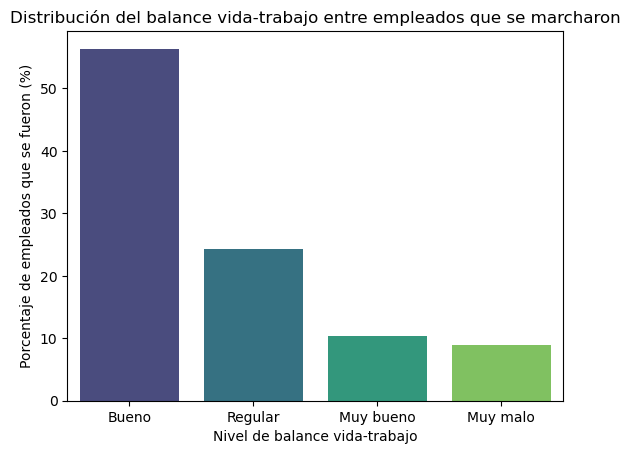

In [58]:
# Crear el gráfico de barras desde la serie
sns.barplot(x=porcentaje.index, y=porcentaje.values, palette='viridis')

plt.xlabel('Nivel de balance vida-trabajo')
plt.ylabel('Porcentaje de empleados que se fueron (%)')
plt.title('Distribución del balance vida-trabajo entre empleados que se marcharon')
plt.show()


### Relación entre el balance y el salario

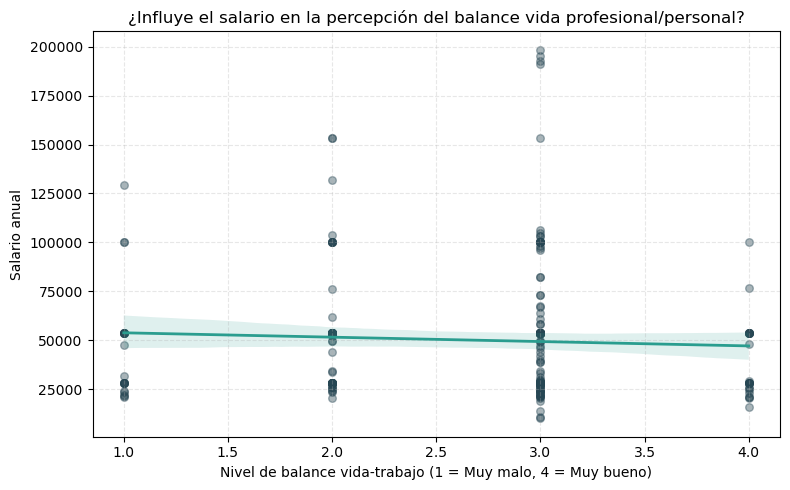

In [61]:
plt.figure(figsize=(8, 5))

sns.regplot(
    data=df_rotacion,
    x='work_life_balance',
    y='annual_salary',
    color='#2a9d8f',  # línea de regresión azul verdosa
    scatter_kws={'s': 30, 'alpha': 0.4, 'color': '#264653'},  # puntos más pequeños y oscuros
    line_kws={'linewidth': 2}
)

plt.xlabel('Nivel de balance vida-trabajo (1 = Muy malo, 4 = Muy bueno)')
plt.ylabel('Salario anual')
plt.title('¿Influye el salario en la percepción del balance vida profesional/personal?')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Satisfacción general de los que se marcharon

In [62]:
porcentaje2 = df_rotacion['job_satisfaction_level'].value_counts(normalize=True) * 100
porcentaje2= porcentaje2.round(2)

print(porcentaje2)

job_satisfaction_level
3    29.34
1    27.03
4    23.17
2    20.46
Name: proportion, dtype: float64


In [67]:
df_rotacion.columns

Index(['business_travel_frequency', 'distance_from_home_km',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'overtime_hours',
       'standard_work_hours', 'stock_option_level', 'years_at_company',
       'years_with_current_manager', 'remote_work', 'annual_salary',
       'work_life_balance'],
      dtype='object')

<Axes: xlabel='job_satisfaction_level', ylabel='years_at_company'>

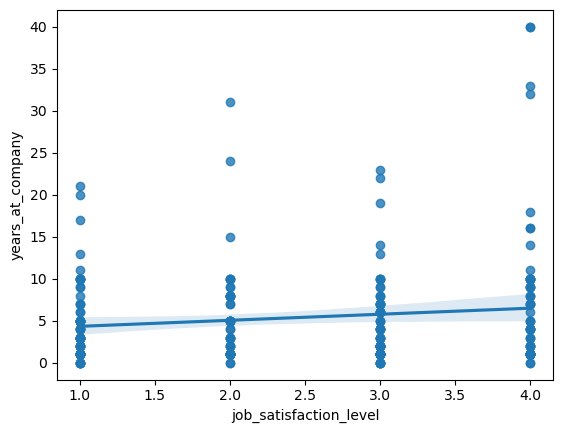

In [69]:
sns.regplot(data=df_rotacion, x='job_satisfaction_level', y ='years_at_company')

In [85]:
porcentaje3 = df_rotacion['remote_work'].value_counts(normalize=True) * 100
porcentaje3= porcentaje3.round(2)

print(porcentaje3)

remote_work
yes    64.48
no     35.52
Name: proportion, dtype: float64


In [ ]:
# Mapeamos la satisfacción laboral a etiquetas categóricas
satisfaccion_map = {
    1.0: 'Muy baja',
    2.0: 'Baja',
    3.0: 'Alta',
    4.0: 'Muy alta'
}

df_rotacion['job_satisfaction_level'] = df_rotacion['job_satisfaction_level'].map(satisfaccion_map)

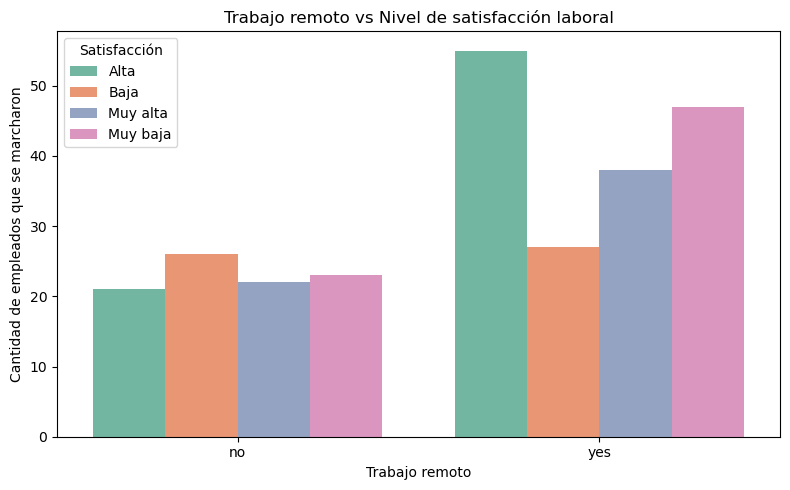

In [87]:
plt.figure(figsize=(8, 5))

sns.countplot(data=df_rotacion, x='remote_work', hue='job_satisfaction_level', palette='Set2')

plt.title('Trabajo remoto vs Nivel de satisfacción laboral')
plt.xlabel('Trabajo remoto')
plt.ylabel('Cantidad de empleados que se marcharon')
plt.legend(title='Satisfacción')
plt.tight_layout()
plt.show()

In [88]:
porcentaje4 = df_rotacion['business_travel_frequency'].value_counts(normalize=True) * 100
porcentaje4= porcentaje4.round(2)

print(porcentaje4)

business_travel_frequency
unknown              49.42
travel_rarely        33.20
travel_frequently    13.90
non_travel            3.47
Name: proportion, dtype: float64


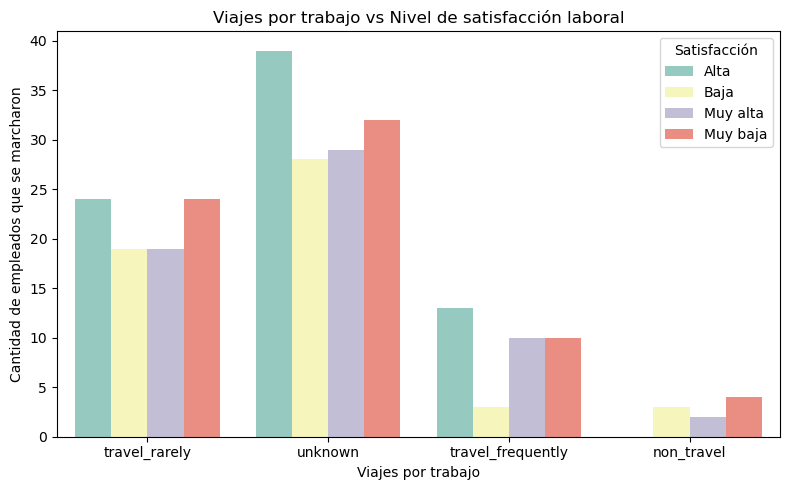

In [89]:
plt.figure(figsize=(8, 5))

sns.countplot(data=df_rotacion, x='business_travel_frequency', hue='job_satisfaction_level', palette='Set3')

plt.title('Viajes por trabajo vs Nivel de satisfacción laboral')
plt.xlabel('Viajes por trabajo')
plt.ylabel('Cantidad de empleados que se marcharon')
plt.legend(title='Satisfacción')
plt.tight_layout()
plt.show()

In [90]:
porcentaje5 = df_rotacion['years_with_current_manager'].value_counts(normalize=True) * 100
porcentaje5= porcentaje5.round(2)

print(porcentaje5)

years_with_current_manager
0     33.59
2     21.24
7     15.44
3      8.11
4      5.02
1      4.25
8      3.86
9      2.70
6      1.93
5      1.54
10     1.16
14     0.77
11     0.39
Name: proportion, dtype: float64


<Axes: xlabel='years_with_current_manager', ylabel='years_at_company'>

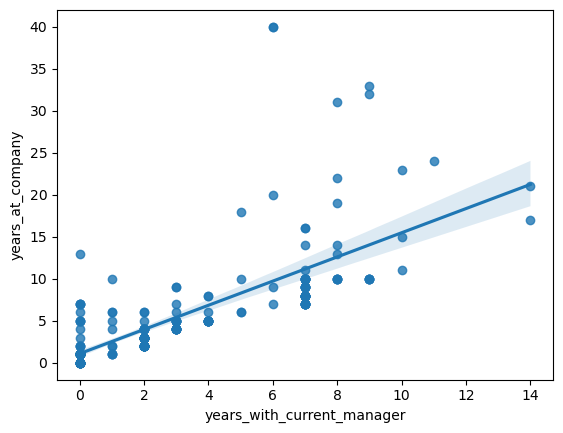

In [94]:
sns.regplot (data = df_rotacion, x= 'years_with_current_manager',y = 'years_at_company')

<Axes: xlabel='environmental_satisfaction_level', ylabel='years_with_current_manager'>

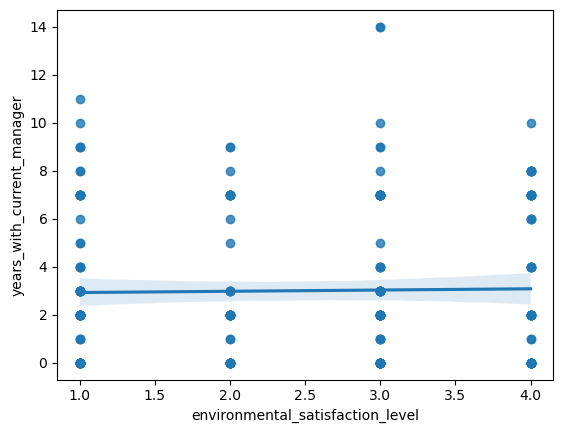

In [98]:
sns.regplot (data = df_rotacion, y= 'years_with_current_manager',x = 'environmental_satisfaction_level')

<Axes: xlabel='job_involvement_level', ylabel='years_with_current_manager'>

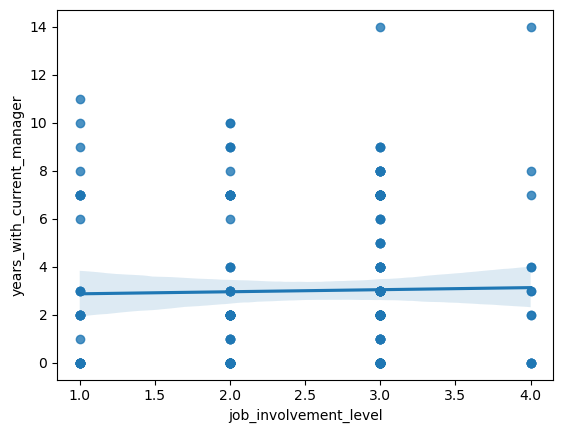

In [99]:
sns.regplot (data = df_rotacion, y= 'years_with_current_manager',x = 'job_involvement_level')

Jerarquía y satisfacción

In [100]:
df_rotacion.columns

Index(['business_travel_frequency', 'distance_from_home_km',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'overtime_hours',
       'standard_work_hours', 'stock_option_level', 'years_at_company',
       'years_with_current_manager', 'remote_work', 'annual_salary',
       'work_life_balance', 'remote_work_num'],
      dtype='object')

In [101]:
porcentaje6 = df_rotacion['job_level'].value_counts(normalize=True) * 100
porcentaje6= porcentaje6.round(2)

print(porcentaje6)

job_level
1    59.07
2    23.17
3    13.90
5     1.93
4     1.93
Name: proportion, dtype: float64


Promoción y satisfacción

In [104]:
mapeo_stock = {
    0: 'Ninguna',
    1: 'Baja',
    2: 'Media',
    3: 'Alta'
}

In [106]:
df_rotacion['stock_option_level'] = df_rotacion['stock_option_level'].map(mapeo_stock)

In [107]:
porcentaje7 = df_rotacion['stock_option_level'].value_counts(normalize=True) * 100
porcentaje7= porcentaje7.round(2)

print(porcentaje7)

stock_option_level
Ninguna    63.71
Baja       25.48
Alta        6.18
Media       4.63
Name: proportion, dtype: float64


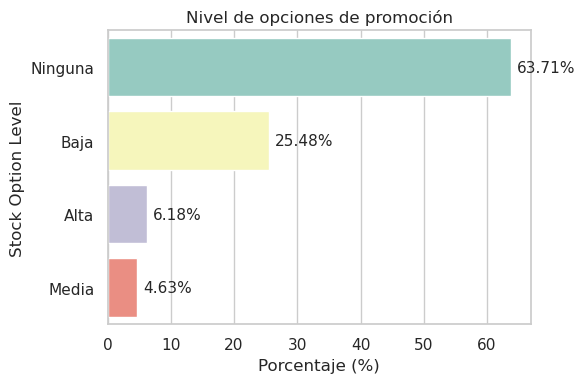

In [115]:
# Usamos el índice como etiquetas (niveles)
labels = porcentaje7.index.astype(str)
values = porcentaje7.values

plt.figure(figsize=(6, 4))
ax = sns.barplot(y=labels, x=values, palette='Set3')

# Añadimos porcentajes sobre las barras
for i, val in enumerate(values):
    ax.text(val + 1, i, f'{val:.2f}%', ha='left', va='center', fontsize=11)

plt.title('Nivel de opciones de promoción')
plt.ylabel('Stock Option Level')
plt.xlabel('Porcentaje (%)')
plt.tight_layout()
plt.show()


In [113]:
df_rotacion['job_satisfaction_level'].value_counts()

job_satisfaction_level
Alta        76
Muy baja    70
Muy alta    60
Baja        53
Name: count, dtype: int64

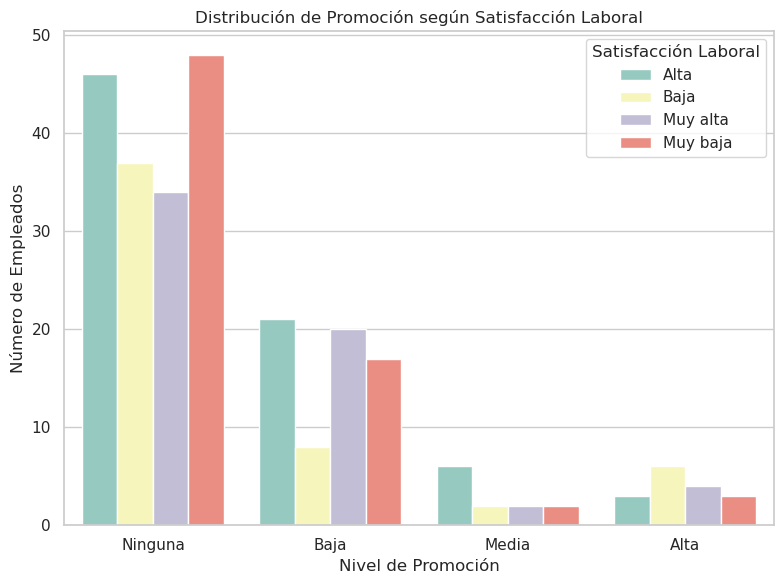

In [116]:
# Crear una gráfica de barras con el 'hue' como nivel de satisfacción laboral
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_rotacion, x="stock_option_level", hue="job_satisfaction_level", palette='Set3')

# Añadir etiquetas y título
plt.title("Distribución de Promoción según Satisfacción Laboral")
plt.xlabel("Nivel de Promoción")
plt.ylabel("Número de Empleados")
plt.legend(title="Satisfacción Laboral")

# Mostrar la gráfica
plt.tight_layout()
plt.show()